In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx

from src.features import read_graph as read
from src.features import graph_statistics as stats
from src.data import random_graph as rg

r_seed = 123

%load_ext autoreload
%autoreload 2

# Test with random Graphs

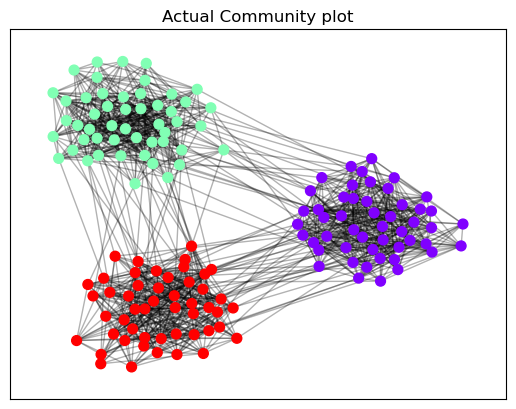

In [2]:
RG = rg.RandomCommunitiesGraph()
G, actual_com = RG.generate_random_com_graph(N=150,
                                            n_groups=3,
                                            p_in_group=0.3,
                                            p_out_group=0.01,
                                            seed=r_seed)

S = stats.GraphStats(G, actual_com)
S.draw(seed=r_seed)

In [3]:
S.getCommunityStats()

Average in-group probability: 0.3034
Average out-group probability: 0.0117


,number_of_nodes,in_group_degree,in_group_probability,out_group_degree,out_group_probability
0,50,760,0.310204,60,0.0120
1,50,754,0.307755,52,0.0104
2,50,716,0.292245,64,0.0128


# Explore real datasets

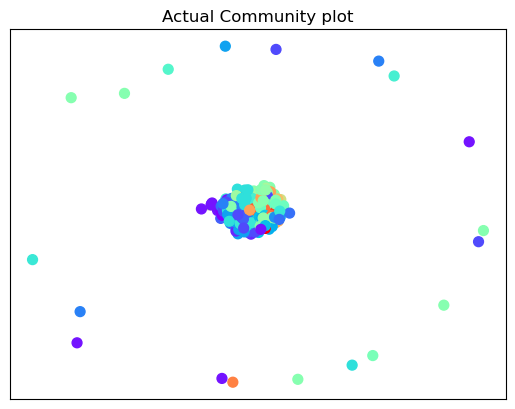

In [4]:
G = read.createGraph("../data/raw/email_data.txt")

# delete self loops, as they are not informative in this problem
G.remove_edges_from(nx.selfloop_edges(G))

actual_com = read.createActualCommunity("../data/raw/email_communities.txt")

S = stats.GraphStats(G, actual_com)
S.draw(seed=r_seed)

In [13]:
df = S.getCommunityStats()
df.head()

Average in-group probability: 0.3535
Average out-group probability: 0.0264


,number_of_nodes,in_group_degree,in_group_probability,out_group_degree,out_group_probability
0,49,524,0.222789,661,0.014111
1,65,662,0.159135,972,0.015908
2,10,48,0.533333,172,0.017286
3,12,64,0.484848,234,0.019637
4,109,1490,0.126572,1889,0.019342


The gap is actually large, but the performance seems not good in our tests.

This might be caused by the outside seemingly isolated nodes. Let's explore them.

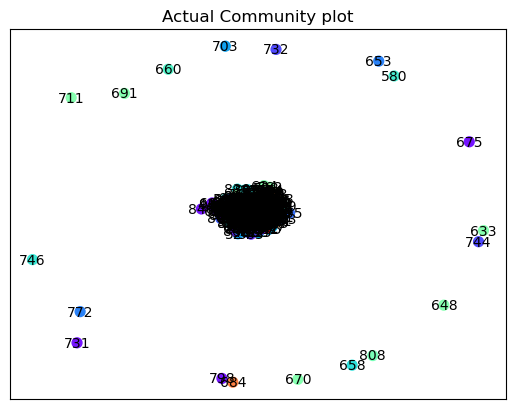

In [29]:
S.draw(seed=r_seed, with_labels=True)

In [36]:
def exploreIsolated(i):
    
    com = S.G.nodes[i]["community"]
    same_com = []
    diff_com = []
    
    for neighbor in nx.neighbors(S.G, i):
        if S.G.nodes[neighbor]["community"] == com:
            same_com.append(neighbor)
        else:
            diff_com.append(neighbor)
            

    
    return same_com, diff_com

In [49]:
isolated = [711, 691, 660, 703, 732, 653, 580, 675,
            633, 744, 648, 808, 658, 670, 731, 772,
            746, 684, 798]

zero_degree = []
for i in isolated:
    if S.G.degree[i] == 0:
        zero_degree.append(i)
    else:
        print(f"Node {i}:")
        same_com, diff_com = exploreIsolated(i)
        print("\tSame Community Nodes:", same_com)
        print("\tSame Community Nodes:", diff_com)
        
print(f"zero_degree is {len(zero_degree)}/{len(isolated)}")

zero_degree is 19/19


These isolated nodes are nodes with zero degrees, and we can try to remove them

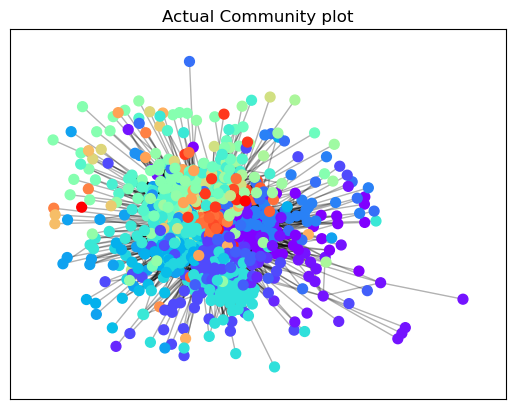

In [50]:
S.G.remove_nodes_from(isolated)
S.draw(seed=r_seed)

In [51]:
df = S.getCommunityStats()
df.head()

Average in-group probability: 0.3607
Average out-group probability: 0.0273


,number_of_nodes,in_group_degree,in_group_probability,out_group_degree,out_group_probability
0,49,524,0.222789,661,0.014397
1,62,662,0.175040,972,0.016967
2,10,48,0.533333,172,0.017623
3,12,64,0.484848,234,0.020021
4,107,1490,0.131370,1889,0.020084
